In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# These are the paths to the data. These differ per user. 
test = pd.read_csv('/Users/imac/Documents/Tijdelijk/Machine Learning/EindProject/ml-project/data/test.csv', 
                   delimiter=',')
train = pd.read_csv('/Users/imac/Documents/Tijdelijk/Machine Learning/EindProject/ml-project/data/train.csv', 
                    delimiter=',')

The following code is to prepare the data to be optimized. 

In [3]:
def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species)           
    classes = list(le.classes_)                    
    test_ids = test.id                             
    
    train = train.drop(['species', 'id'], axis=1)  
    test = test.drop(['id'], axis=1)
    
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)

In [4]:
sss = StratifiedShuffleSplit(test_size=0.2, random_state=23)
sss.get_n_splits(train.values, labels)

for train_index, test_index in sss.split(train.values, labels):
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

The following code is the actual gridseach on the parameters for KNeighbors, DecisionTrees and AdaBoost.

In [5]:
#These are the parameters we are going to optimize using gridseach.
parameters_KN = [{'n_neighbors':range(1, 10), 'weights':['uniform', 'distance']}]
parameters_DT = [{'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'min_samples_leaf':[1, 2]}]

# I leave all these in because it shows we tries all these, and found that the best ones were with the smallest
# learning rate
parameters_AB = [{'n_estimators':range(25,75), 'learning_rate':[0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]}]
parameters_AB_low = [{'n_estimators':range(25,75), 'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7]}] 
parameters_AB_lower = [{'n_estimators':range(25,75), 'learning_rate':[0.01,0.02,0.03,0.04,0.05,0.06,0.07, 0.08, 0.09]}] 

In [6]:
# KNEIGHBORS
print("# Tuning hyper-parameters for accuracy")
    
clf = GridSearchCV(KNeighborsClassifier(n_neighbors=3, weights='uniform', n_jobs=-1), parameters_KN, cv=5,
                   scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on development set: \n")
print(clf.best_params_)

Grid_scores_KN = []
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    Grid_scores_KN.append("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Tuning hyper-parameters for accuracy
Best parameters set found on development set: 

{'n_neighbors': 1, 'weights': 'uniform'}


In [7]:
# DECISION TREE
print("# Tuning hyper-parameters for accuracy")

clf = GridSearchCV(DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_leaf=1), 
                      parameters_DT, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on development set: \n")
print(clf.best_params_)

Grid_scores_DT = []
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    Grid_scores_DT.append("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Tuning hyper-parameters for accuracy
Best parameters set found on development set: 

{'splitter': 'best', 'criterion': 'entropy', 'min_samples_leaf': 1}


In [36]:
# ADABOOST
print("# Tuning hyper-parameters for accuracy")

clf = GridSearchCV(AdaBoostClassifier(n_estimators=50, learning_rate=1.0), parameters_AB, 
                   cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on development set: \n")
print(clf.best_params_)

Grid_scores_AB = []
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    Grid_scores_AB.append("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Tuning hyper-parameters for accuracy
Best parameters set found on development set: 

{'n_estimators': 67, 'learning_rate': 0.7}


In [38]:
# ADABOOST LOW
print("# Tuning hyper-parameters for accuracy")

clf = GridSearchCV(AdaBoostClassifier(n_estimators=50, learning_rate=1.0), parameters_AB_low, 
                   cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on development set: \n")
print(clf.best_params_)

Grid_scores_AB_low = []
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    Grid_scores_AB_low.append("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Tuning hyper-parameters for accuracy
Best parameters set found on development set: 

{'n_estimators': 70, 'learning_rate': 0.1}


In [8]:
# ADABOOST LOWER
print("# Tuning hyper-parameters for accuracy")

clf = GridSearchCV(AdaBoostClassifier(n_estimators=50, learning_rate=1.0), parameters_AB_lower, 
                   cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on development set: \n")
print(clf.best_params_)

Grid_scores_AB_lower = []
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    Grid_scores_AB_lower.append("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Tuning hyper-parameters for accuracy
Best parameters set found on development set: 

{'n_estimators': 74, 'learning_rate': 0.03}


This is where we'll visualise the scores

In [11]:
%matplotlib inline

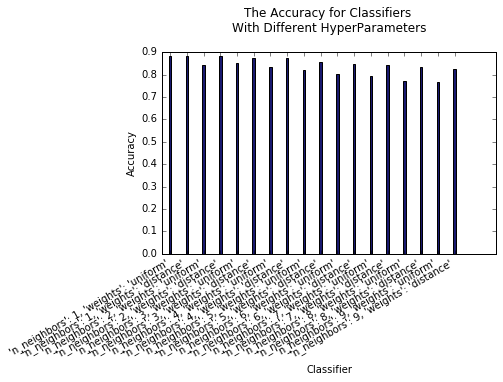

In [15]:
the_y = [x.split(' ')[0] for x in Grid_scores_KN]
the_x = [x.split('{')[1][:-1] for x in Grid_scores_KN]

import pylab

Number = range(36)[1::2]

fig, ax = plt.subplots()

ax = plt.subplot(111)
ax.bar(Number, the_y, width=0.3, color='midnightblue', align='center')
plt.xticks(Number, the_x)

#Layout
ax.set_axis_bgcolor('white')

ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.set_title('The Accuracy for Classifiers \nWith Different HyperParameters\n')

fig.autofmt_xdate()

plt.show()

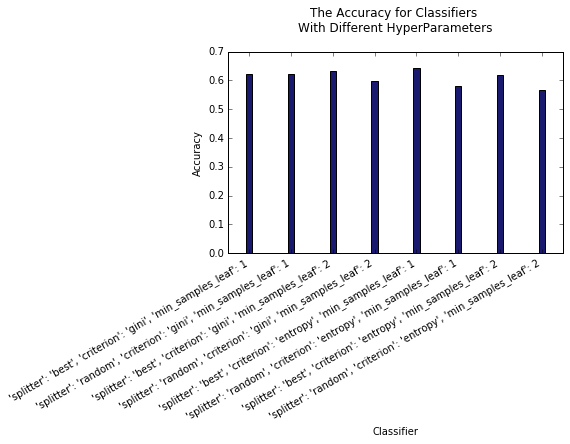

In [12]:
the_y = [x.split(' ')[0] for x in Grid_scores_DT]
the_x = [x.split('{')[1][:-1] for x in Grid_scores_DT]

import pylab

Number = range(2*len(the_y))[1::2]

fig, ax = plt.subplots()

ax = plt.subplot(111)
ax.bar(Number, the_y, width=0.3, color='midnightblue', align='center')
plt.xticks(Number, the_x)

#Layout
ax.set_axis_bgcolor('white')

ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.set_title('The Accuracy for Classifiers \nWith Different HyperParameters\n')

fig.autofmt_xdate()

plt.show()

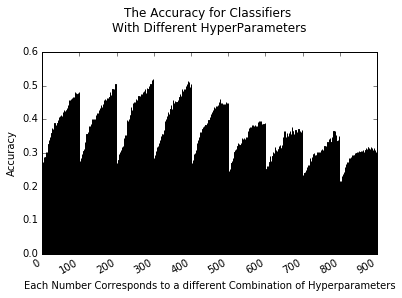

In [17]:
the_y = [x.split(' ')[0] for x in Grid_scores_AB_lower]
the_x = [x.split('{')[1][:-1] for x in Grid_scores_AB_lower]

import pylab

Number = range(2*len(the_y))[1::2]

fig, ax = plt.subplots()

ax = plt.subplot(111)
ax.bar(Number, the_y, width=0.3, color='midnightblue', align='center')
#plt.xticks(Number, the_x)

#Layout
ax.set_axis_bgcolor('white')

ax.set_xlabel('Each Number Corresponds to a different Combination of Hyperparameters')
ax.set_ylabel('Accuracy')
ax.set_title('The Accuracy for Classifiers \nWith Different HyperParameters\n')

fig.autofmt_xdate()

plt.show()